# Intro To NLP

**The term “NLP”**

* It’s not the most relevant term
* Used to be relevant so stuck
* Now NLG and NLU are the focus

**What are the applications?**

* Sentiment Analysis
* Topic Modelling
* Semantic Relatedness
* Conversational Systems
* Information Retrieval
* Question Answering Systems

**Linguistic Tagging**

* Tagging is one of the most important concepts, specific to NLP
* Tagging deals with identifying words/phrases in a document as per their roles in that document
* This is not a concept of 'Machine Learning' per se
* This falls more in the Linguistics domain
* Although, now for better tagging, models powered by (Deep)Neural Nets are used

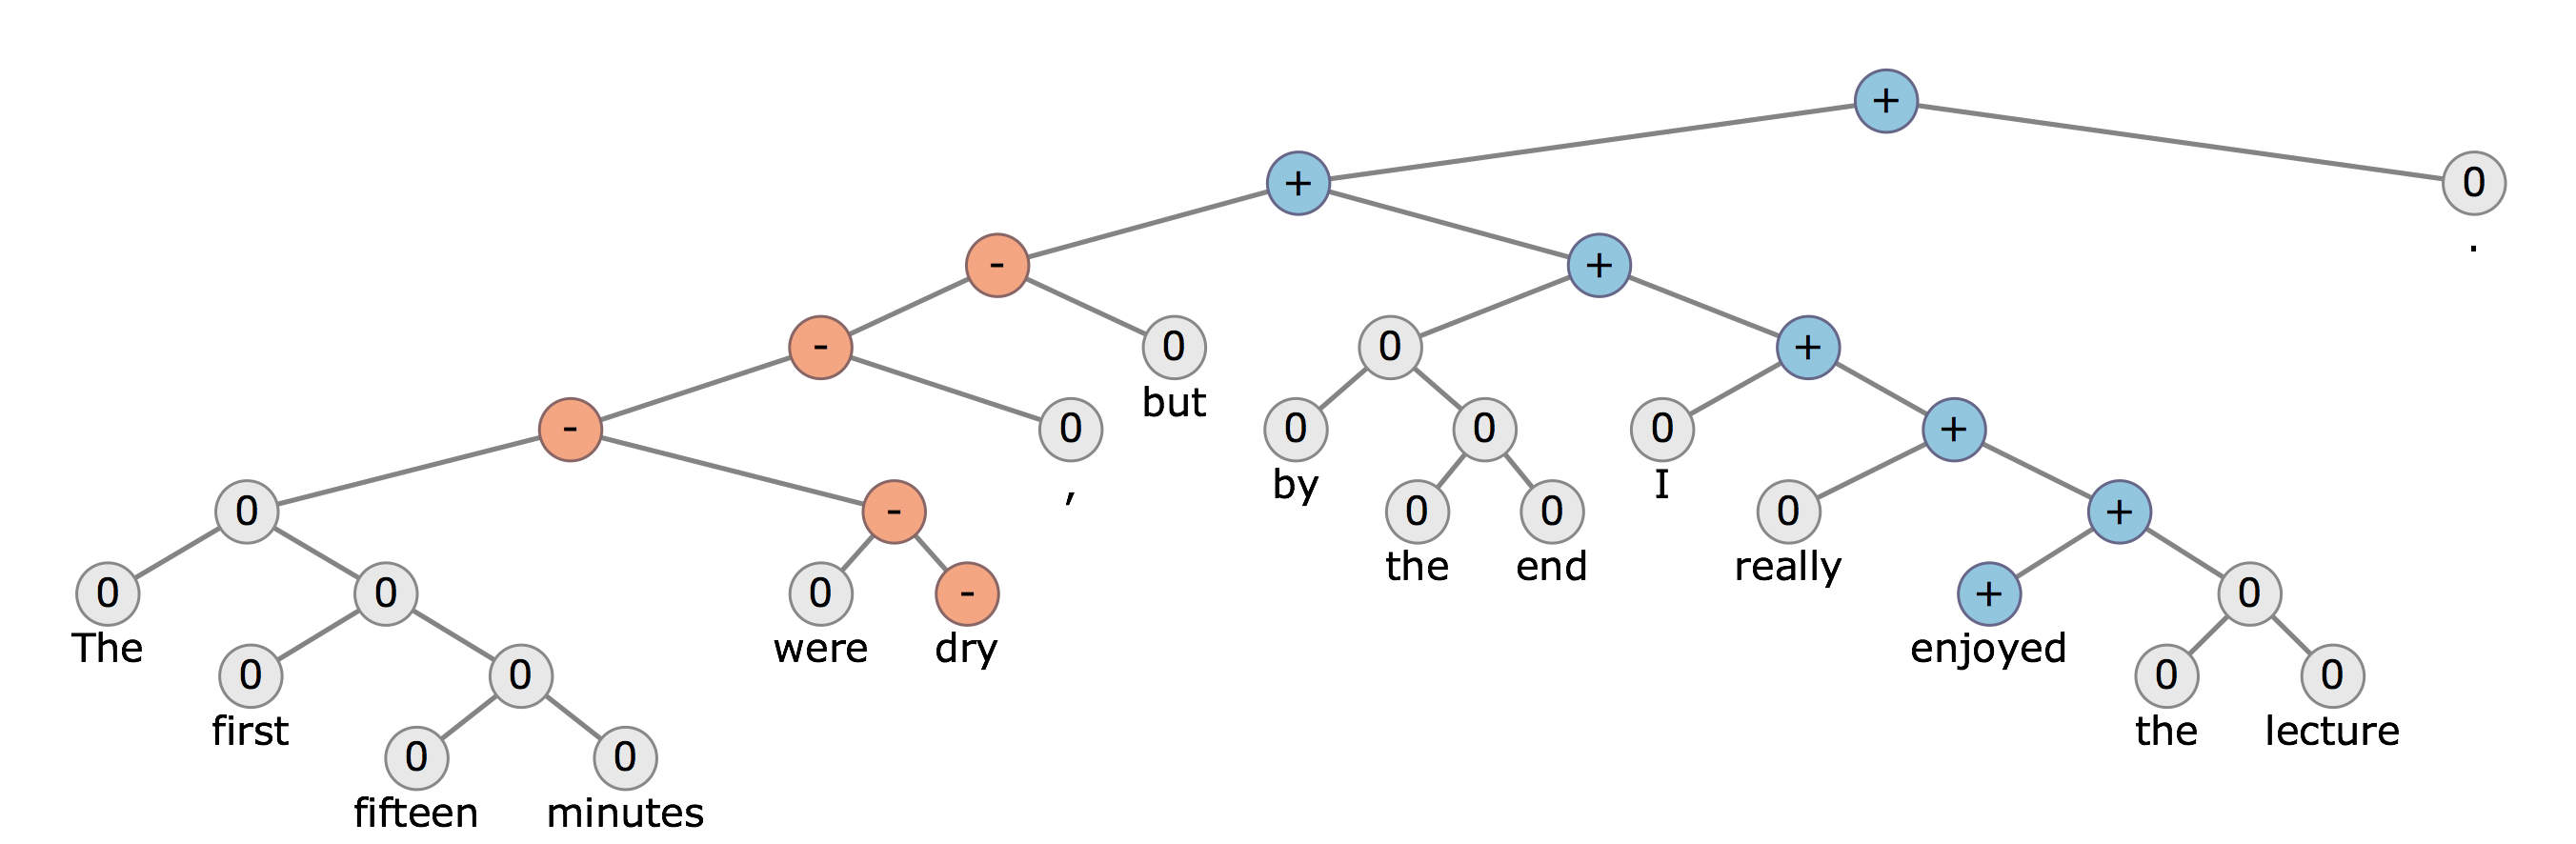

In [101]:
Image.open('../workshop/images/treeFrontSentiment.png')

## Extras

In [1]:
from IPython.display import Markdown, display
def printmd(string):
    try:
        display(Markdown(string))
    except:
        display(string)
        
import itertools
from __future__ import print_function

from copy import deepcopy as copy

%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import imresize
def img_to_array(img, resize=100):

    img_ = Image.open(img)
    np_img = np.asanyarray(img_)
    normalized_np_img = imresize(np_img,resize)
    
    plt.imshow(normalized_np_img)

## Importing Model

In [70]:
import spacy
from spacy import en
import en_core_web_md
parser = en_core_web_md.load()

## POS Tagging

In [71]:
def pos_tagger(text):
    
    parsed = parser(text)
    return [(token, token.pos_) for token in parsed]

string = 'Mr. Wanton is the first president of book club.'
word_tag_pairs = pos_tagger(string)

for word, tag in word_tag_pairs:
    printmd ("* "+word.text + " -> " + tag)

* Mr. -> PROPN

* Wanton -> PROPN

* is -> VERB

* the -> DET

* first -> ADJ

* president -> NOUN

* of -> ADP

* book -> NOUN

* club -> NOUN

* . -> PUNCT

## Chunking

In [72]:
def noun_chunks(text):
    
    parsed = parser(text)
    return list(parsed.noun_chunks)

string = 'Mr. Wanton is the first president of book club.'
chunks = noun_chunks(string)

for chunk in chunks:
    printmd("* "+chunk.text)

* Mr. Wanton

* the first president

* book club

In [73]:
def chunk_replacer(chunks,text):
    
    for chunk in chunks:
        text = text.replace(chunk.text , "**"+chunk.text.replace(' ','_')+"**")
        
    printmd(text)


chunk_replacer(chunks,string)

**Mr._Wanton** is **the_first_president** of **book_club**.

## Named Entity Recognition (NER)

In [74]:
def entity_tagger(text):
    
    parsed = parser(text)
    return [(token, token.ent_type_) for token in parsed]

string = 'Mr. Wanton is the first president of book club who went to Paris.'
word_tag_pairs = entity_tagger(string)

for word, tag in word_tag_pairs:
    printmd ("* "+word.text + " -> " + tag)

* Mr. -> 

* Wanton -> PERSON

* is -> 

* the -> 

* first -> ORDINAL

* president -> 

* of -> 

* book -> 

* club -> 

* who -> 

* went -> 

* to -> 

* Paris -> GPE

* . -> 

In [75]:
tag_template = {'PERSON':'**Person**',
                'GPE':'**Place**',
                'ORDINAL':'**Number**'}

def template(text):
    
    parsed = parser(text)
    
    for token in parsed:
        try:
            template_tag = tag_template[token.ent_type_]
            text = text.replace(token.text,
                                template_tag)
        except KeyError:
            pass
        
    printmd(text)


template(string)

Mr. **Person** is the **Number** president of book club who went to **Place**.

# Regular Expressions

## Some Basic Regular Expressions

In RE, there are some special characters which represents a particular set of words. Some of these are:

* '.'  used to match any character
* '^'  used to match start of a string
* '$'  used to match end of the string
* '*'  used to match 0 or more repetitions
* '+'  used to match 1 or more repetitions
* '?'  used to match 0 or 1 number of copies

Sometimes a programming language augment universal Regular Expressions with additional symbols. Symbols like '.', '*' have same meaning(in terms of RE) in every programming language, but in addition to those Python also provides these following RE symbols:

* \w  matches all alpha-numerics(a, B, 9, 0, etc.)
* \W  matches all except alpha-numerics (opposite of \w)  
* \d  matches all the numbers(0, 9, 8, etc.)
* \D  matches all except numbers
* \s  matches all the white-spaces(spaces, new line characters, tabs, etc.)
* \S  matches all except white-spaces

Also:

* [ab]  matches either a "or" b
* [a-z]  matches all the lower case of alphabets("-" depicts range)
* [A-Z]  matches all the upper case of alphabets
* [0-9]  matches all the numbers
* [a-zA-Z]  matches all the alphabets (upper and lower case)("and")
* [^ab]  matches all except a or b (opposite of '[ab]')("^" stands for not)
* {n}  matches 'n' number of copies of previous regex
* '\'  either used to indicate special sequences (\w,\d,\s etc) or as escape character for special characters 

## RE Playground

In [134]:
import re

string = "WOW this number \t 886988 is a Mirror Palindrome."

# Let's Begin

# Word Vectors

Word Vectors or Word Embeddings are numeric representation of words. It could be a single number, array or numbers, matrix of numbers etc.

## Importance
Three main reasons:

* Computer cannot do computations on strings (especially GPUs).
* Strings don’t hold much explicit information about themselves.
* Words Vectors are usually dense vector representations.

## Types
* Frequency based : Use statistics to compute probability of a word co-occurring with respect to it’s neighbouring words.
* Prediction based : Use predictive analysis to make a weighted guess of a word co-occurring with respect to it’s neighbouring words.

### Frequency Based

In [24]:
#----- Count Vectors -----#
from sklearn.feature_extraction.text import CountVectorizer

#Unigram Count
vectorizer = CountVectorizer(min_df=1)

a = vectorizer.fit_transform(["he is a sweet boy. he doesn't like to talk. he is shy."])

vectorizer.vocabulary_

vocab = sorted(vectorizer.vocabulary_, key=vectorizer.vocabulary_.get)
vectors = a.toarray()[0]
uni_pairs = list(zip(vocab,vectors))

print ('Unigram Vocab: ',vocab[:5])
print ('Unigram Vectors: ',vectors[:5])
print ('Unigram Pairs: ',uni_pairs[:5])

print ('\n','#'*80,'\n')

#Bigram Count
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), min_df=1)

b = bigram_vectorizer.fit_transform(["he is a sweet boy. he does not like to talk. he is shy."])

bigram_vectorizer.vocabulary_

grams = sorted(bigram_vectorizer.vocabulary_, key=bigram_vectorizer.vocabulary_.get)
vectors = b.toarray()[0]
bi_pairs = list(zip(grams,vectors))

print ('Bigram Vocab: ',grams[:5])
print ('Bigram Vectors: ',vectors[:5])
print ('Bigram Pairs: ',bi_pairs[:5])

Unigram Vocab:  ['boy', 'doesn', 'he', 'is', 'like']
Unigram Vectors:  [1 1 3 2 1]
Unigram Pairs:  [('boy', 1), ('doesn', 1), ('he', 3), ('is', 2), ('like', 1)]

 ################################################################################ 

Bigram Vocab:  ['boy', 'boy he', 'does', 'does not', 'he']
Bigram Vectors:  [1 1 1 1 3]
Bigram Pairs:  [('boy', 1), ('boy he', 1), ('does', 1), ('does not', 1), ('he', 3)]


### Prediction Based

* These vectors are based on probability of a word occuring in a neighbourhood (words surrounding a word)
* Now this could be the neighbourhood guessing the word or vice-versa
* Predictive models use a neural network (mostly) to predict the probability of a word occuring next to another word
* This method leads to the resulting vector incorporating semantics of the words and not just co-occurance

# Word2Vec

* Skipgram
* CBOW

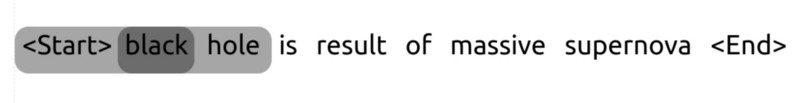

In [106]:
Image.open('../workshop/images/supernova.jpg')

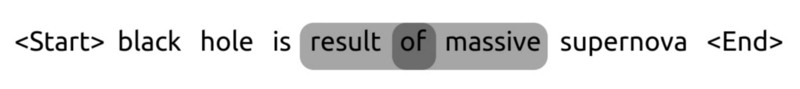

In [79]:
Image.open('../workshop/images/resultofmassive.jpg')

### Internal Structure

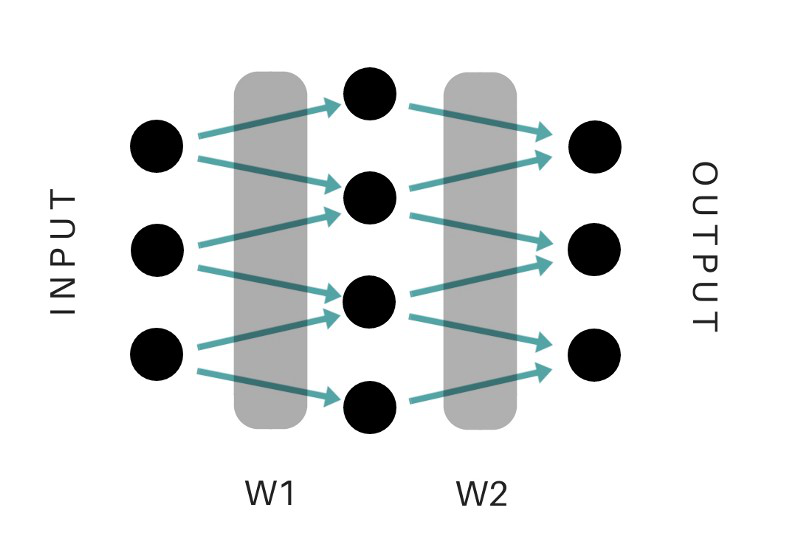

In [80]:
Image.open('../workshop/images/weights.jpg')

**W1(s)** and **W2(s)** contain information about the words.
The information in W1 and W2 are _combined/averaged_ to obtain the **Word2Vec representations**.

## Training Word2Vec

### Train using Gensim

### Execution

### Output

In [43]:
from gensim.models import Word2Vec as wv
model = wv.load('/home/ragnarok/models/word2vec/400-dim/vsmall/vsmall_wiki.model')
model_hybrid = wv.load('/home/ragnarok/mukul/codes/word2vec_models/wiki.en.hybrid_latest.500.15.11.model')

In [26]:
model.most_similar("queen")

[('princess', 0.6624001860618591),
 ('king', 0.616841197013855),
 ('empress', 0.5873756408691406),
 ('monarch', 0.5382930040359497),
 ('duchess', 0.5130792260169983),
 ('rasoherina', 0.5060522556304932),
 ('kaʻahumanu', 0.5024633407592773),
 ('maconchy', 0.4988676905632019),
 ('regent', 0.493084579706192),
 ('lady', 0.4836291968822479)]

In [27]:
model.most_similar("man")

[('woman', 0.7017000913619995),
 ('boy', 0.6126421689987183),
 ('girl', 0.610446035861969),
 ('stranger', 0.5274134278297424),
 ('person', 0.5142447352409363),
 ('drunkard', 0.4931849539279938),
 ('warrior', 0.4866832494735718),
 ('thug', 0.4858511686325073),
 ('thief', 0.48108717799186707),
 ('lover', 0.47700273990631104)]

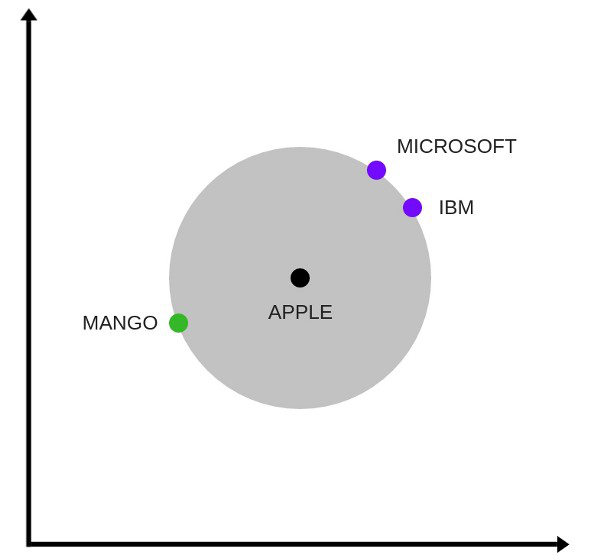

In [127]:
Image.open('../workshop/images/graph1.jpg')

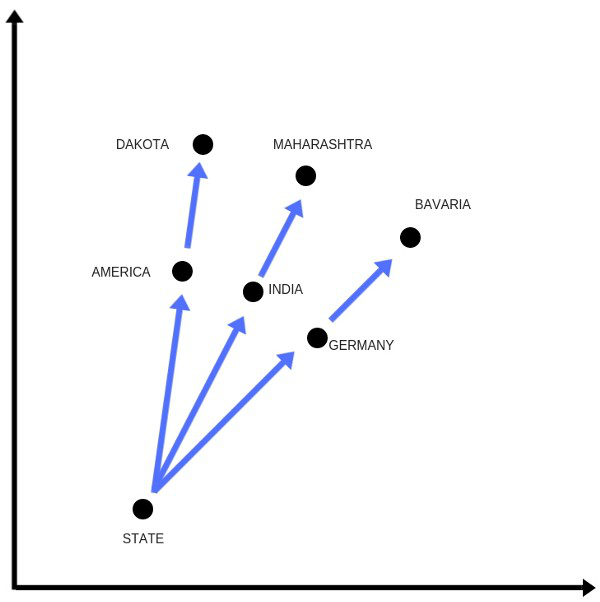

In [83]:
Image.open('../workshop/images/graph2.jpg')

## Plotting Word2Vec Clusters

In [47]:
from gensim.models import Word2Vec as wv
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def w2v_visualize(word1,word2,model):
    cluster1_words = [x for x,y in model.most_similar(word1,topn=100)]
    cluster1_vectors = [model[x] for x in cluster1_words]
    cluster2_words = [x for x,y in model.most_similar(word2,topn=100)]
    cluster2_vectors = [model[x] for x in cluster2_words]
    
    model_t = TSNE(n_components=2, random_state=0)
    
    np.set_printoptions(suppress=True)
    res = model_t.fit_transform(cluster1_vectors+cluster2_vectors)
    
    X = [x[0] for x in res]
    Y = [x[1] for x in res]
    
    colors = ['green' if x<len(cluster1_words) else 'blue' for x in range(2000)]
    plt.figure(figsize=(4,4))
    plt.scatter(X, Y,alpha=0.5,color=colors)

    green_patch = mpatches.Patch(color='green', label=word1,alpha=0.5)
    blue_patch = mpatches.Patch(color='blue', label=word2,alpha=0.5)
    plt.legend(handles=[blue_patch,green_patch])

    plt.show()

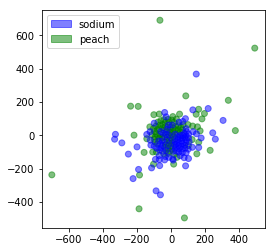

In [50]:
w2v_visualize(word1='peach',word2='sodium',model=model)

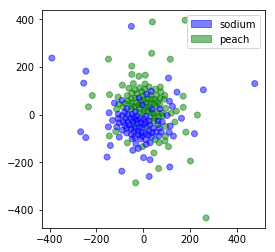

In [51]:
w2v_visualize(word1='peach',word2='sodium',model=model_hybrid)

## Semantic Relatedness

### Let's Code

# Simple Learners

### Naive Bayes

It is a family of probabilistic algorithms based on Bayes Theorem that all share a common principle, that every feature being classified is independent of the value of any other feature.

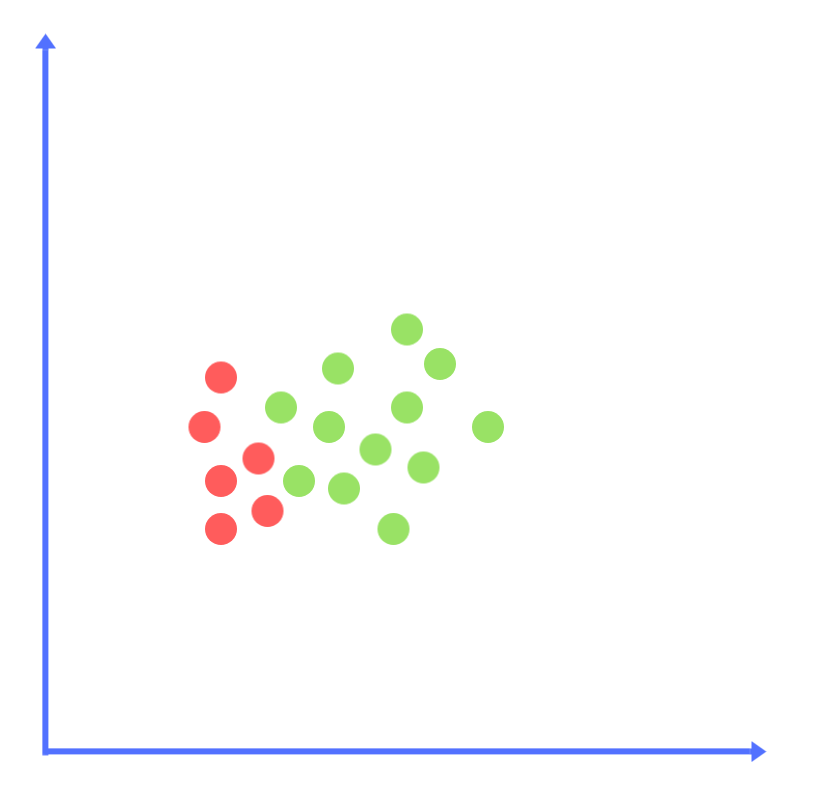

In [2]:
Image.open('images/naive_bayes1.png')

In above diagram, probability of green is twice than that of red. We know this by just looking at the data,, without conducting any experiments. This is called prior. So, essentially, prior probability of green is twice than prior probability of red.

Hence:

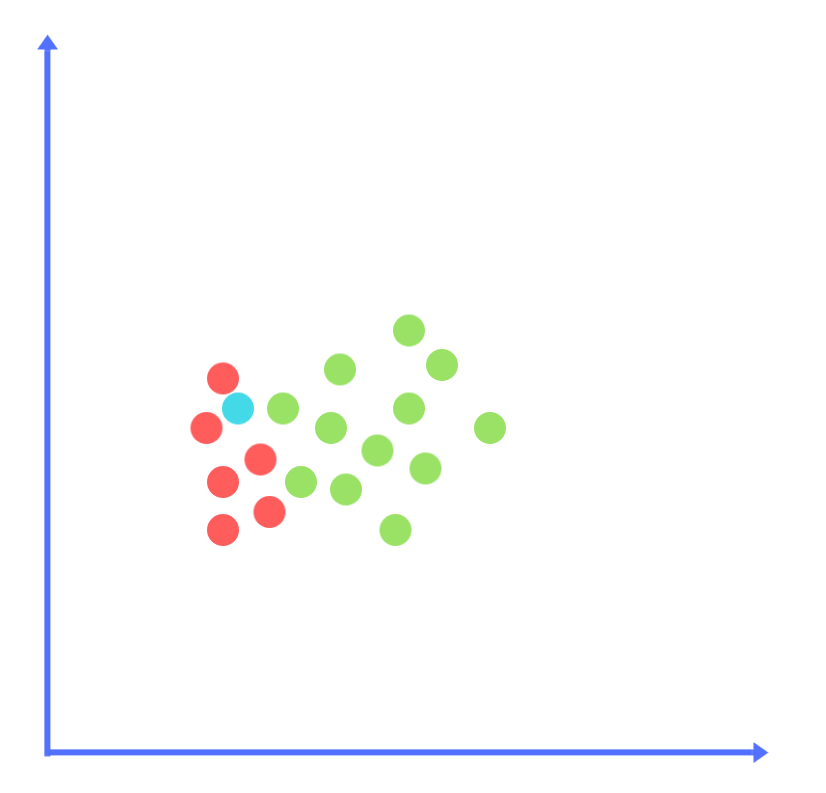

In [4]:
Image.open('images/naive_bayes2.png')

After calculating prior probability, we can now classify the cyan circle. The cyan circle lies more in the vicinity of red than green. One simple way of showing that is by seeing how many circles of red and green color lie in the close vicinity of cyan circle.

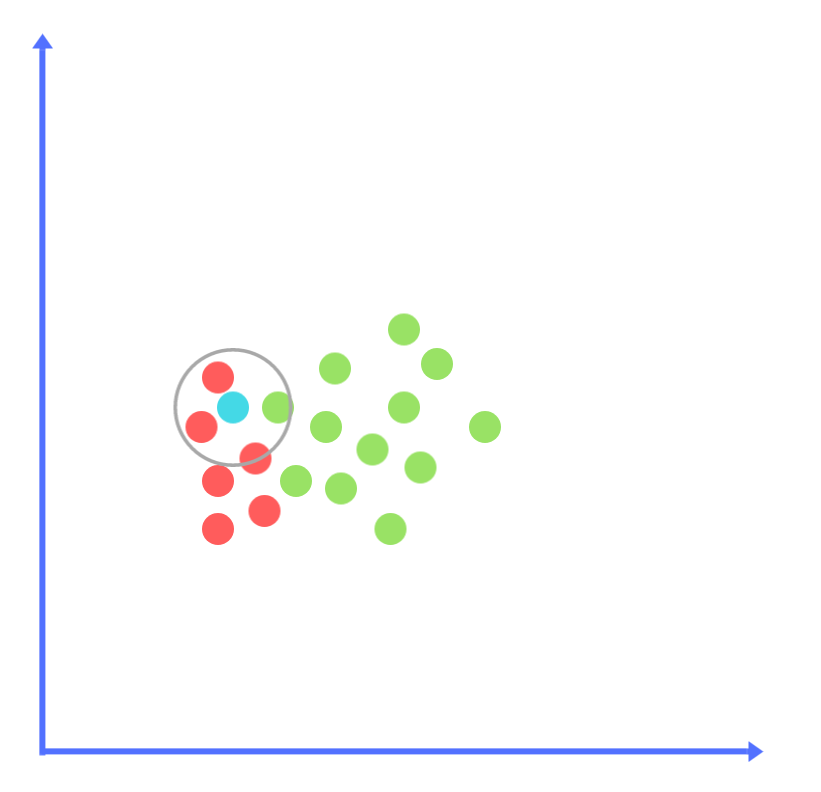

In [5]:
Image.open('images/naive_bayes3.png')

So roughly there are 2 red in close vicinity of cyan while there is 1 green.

Now we calculate likelihood of each:

So posterior probability will be:

We observed posterior(green) < posterior(red) therefore cyan circle will be classified as red.

In [64]:
# Optimized Numeric Operations
import numpy as np

# Modules of the Classifers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Utils for Classifiers
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# For Language
import re
from spacy.en.language_data import STOP_WORDS as stopwords

# Creating a Sklearn Pipeline
# Pipeline class that behaves like a compound classifier
# Making the vectorizer => transformer => classifier easier to work with
text_clf_multi = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),])

text_clf_bren = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB()),])

def clean(text):
    # Remove any word with length less than 3
    words = re.findall("[a-z]{2}[a-z]+",text)
    clean_words = []
    # Removing Stopwords
    for word in words:
        if word not in stopwords:
            clean_words.append(word)
    return ' '.join(clean_words)

# Cleaning positive and negative texts
positive = [(clean(sent),1) for sent in \
            open('polarity.pos',encoding='latin').read().split('\n')]
negative = [(clean(sent),0) for sent in \
            open('polarity.neg',encoding='latin').read().split('\n')]

dataset = np.array(positive+negative)

def find_accuracy(dataset,text_clf):
    nrows = len(dataset)
    X, y = zip(*dataset)
    scores = []
    for epoch in range(10):
        seed = np.random.randint(0,10)
        X_train, X_test, y_train, y_test =\
        	train_test_split(X, y, test_size=0.4, random_state=seed)
        text_clf = text_clf.fit(X_train, y_train)
        y_pred = text_clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f_score = f1_score(y_pred=y_pred,y_true=y_test, average='weighted')
        scores.append((accuracy, f_score))
    mean_acc, mean_f1 = np.mean(scores,axis=0)
    
    return (mean_acc,mean_f1)

multi_acc, multi_f1 = find_accuracy(dataset,text_clf_multi)

bern_acc, bern_f1 = find_accuracy(dataset,text_clf_bren)

printmd ("BernoulliNB's Accuracy: "+"**"+str(bern_acc)+"**")
printmd ("BernoulliNB's F1: "+"**"+str(bern_f1)+"**")

printmd ("MultinomialNB's Accuracy: "+"**"+str(multi_acc)+"**")
printmd ("MultinomialNB's F1: "+"**"+str(multi_f1)+"**")

# Let's Classify some sentences.
# Negative => 0
# Positive => 1
text_clf_bren.predict(["he is the best","she is pretty bad"])

BernoulliNB's Accuracy: **0.756938584154**

BernoulliNB's F1: **0.756826522279**

MultinomialNB's Accuracy: **0.758509142053**

MultinomialNB's F1: **0.7584047517**

array(['1', '0'],
      dtype='<U1')

# Deep Learning

## Working

An Artificial Neural Network is made up of 3 components:

* Input Layer
* Hidden (computation) Layers
* Output Layer

Furthermore the learning happens in two steps:

* Forward-Propagation
* Back-Propagation

In simple words

* forward propagation is making a guess about the answer
* back propagation is minimizing the error between the actual answer and guessed answer.

## Forward-Propagation

* Randomly initialize weights
    * w1
    * w2
    * w3
* Data at input layer is multiplied with weights to form hidden layer
    * h1 = (x1 * w1) + (x2 * w1)
    * h2 = (x1 * w2) + (x2 * w2)
    * h3 = (x1 * w3) + (x2 * w3)
* Output of hidden layer is passed through a non-linear function also known as activation function to form guessed output
    * y_ = fn( h1 , h2, h3 )

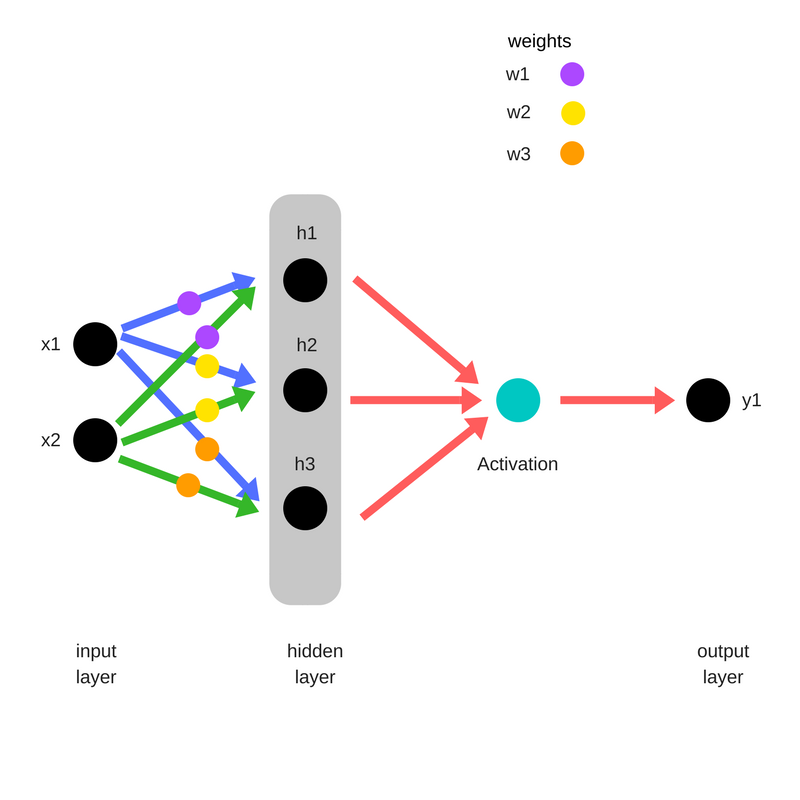

In [66]:
Image.open("../workshop/images/nn_8.png")

## Backward Propagation

* total_error is calculated by calculating the difference between the expected (value in training set) and observed value (value attained from forward propagation) by passing them through a cost function.
* Partial derivative of error is calculated w.r.t each weight ( these partial differentials are measures of contribution of each weight in total_loss )
* The differentials are then multiplied by a small number called learning rate ( η )
* The resultant is then subtracted from the respective weights

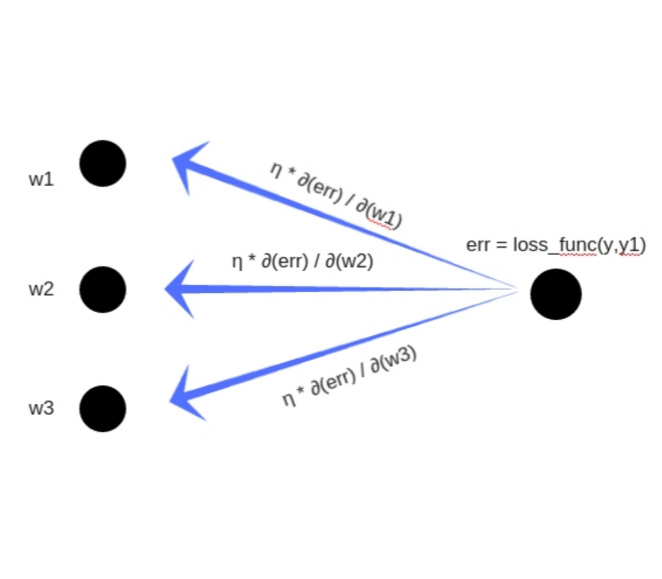

In [68]:
Image.open("../workshop/images/nn_9.png")

## Important Concepts

### Partial Derivatives

_Partial Derivatives are calculated so we know what was the contribution of error by each weight._

Let's explain this with an example:

Let's say that a few kids were asked to throw dart at a dart-board, aiming at the center. The initial results were:

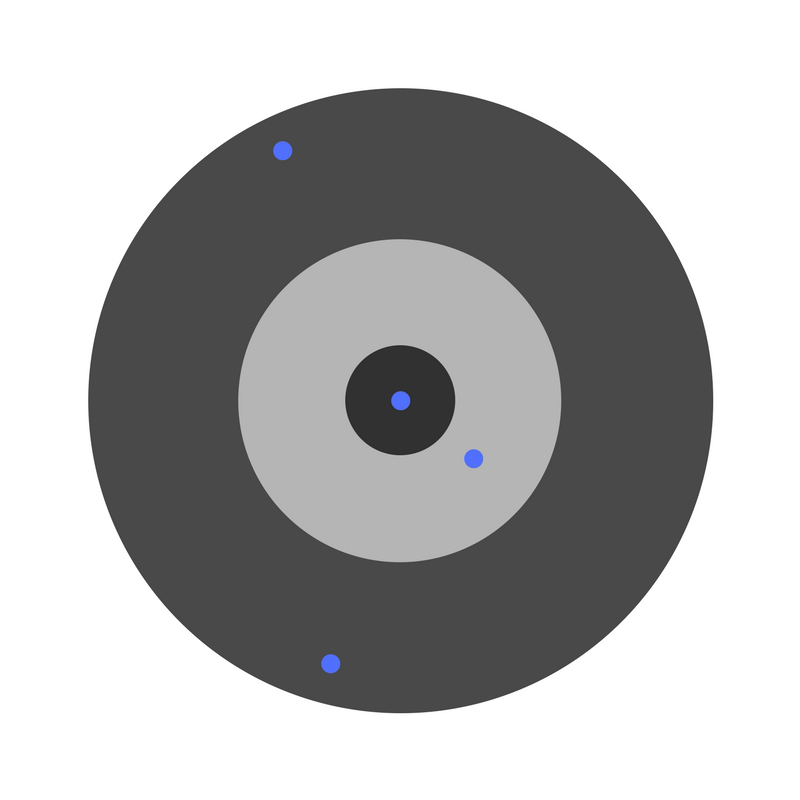

In [100]:
Image.open("../workshop/images/nn_1.jpg")

Now if we found total loss and simply subtracted that from all the weights then we generalize the mistakes made by each student. So let's say a kid aimed too low but we ask all the kids to aim high then it results in:

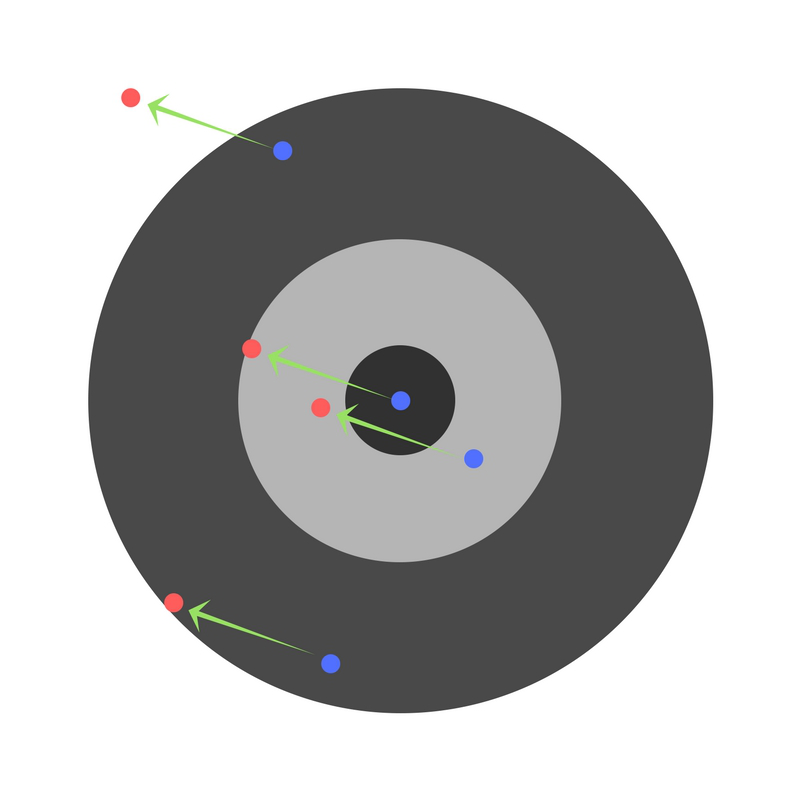

In [102]:
Image.open('../workshop/images/nn_2.jpg')

Now the error of a few students might decrease but overall error still increases.

By finding partial derivatives we find what was the error by each weight individually. Correcting each weight individually results in following results:

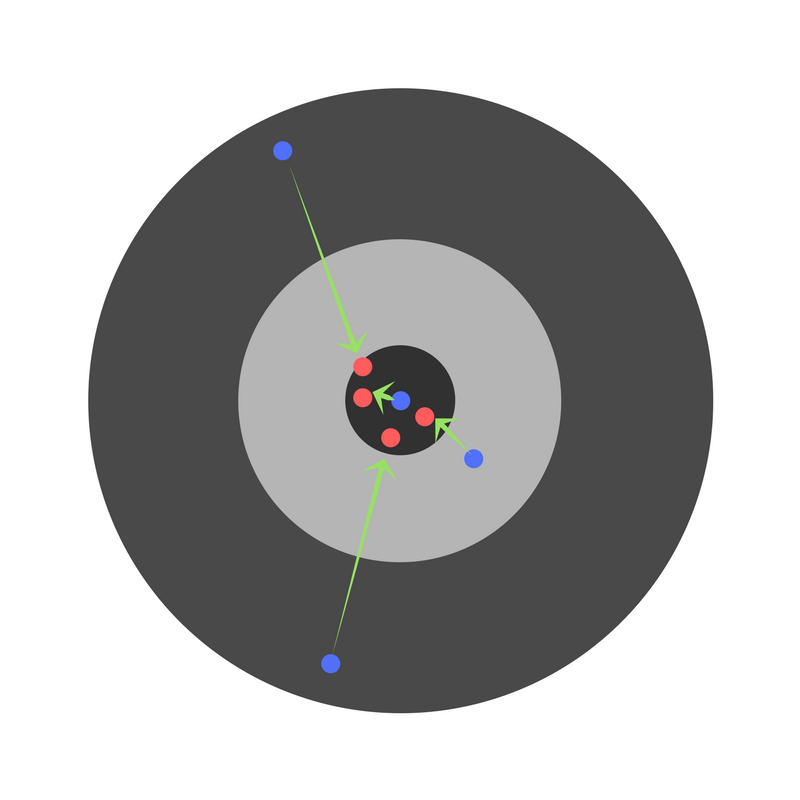

In [103]:
Image.open('../workshop/images/nn_3.jpg')

### Learning Rate

Learning Rate is again a very crucial hyper-parameter. If the learning rate is too small then even after training the NN for long time, it will still be away from the optimal results. Results would look something like:

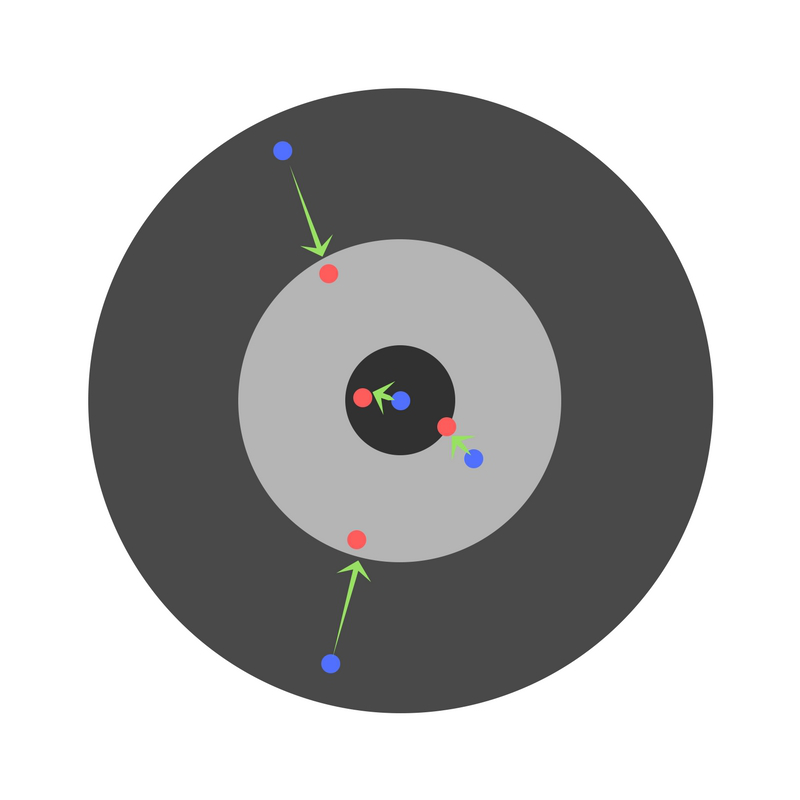

In [128]:
Image.open('../workshop/images/nn_4.jpg')

Instead, if the learning rate is too high then the learner jumps to conclusions too soon. Producing following results:

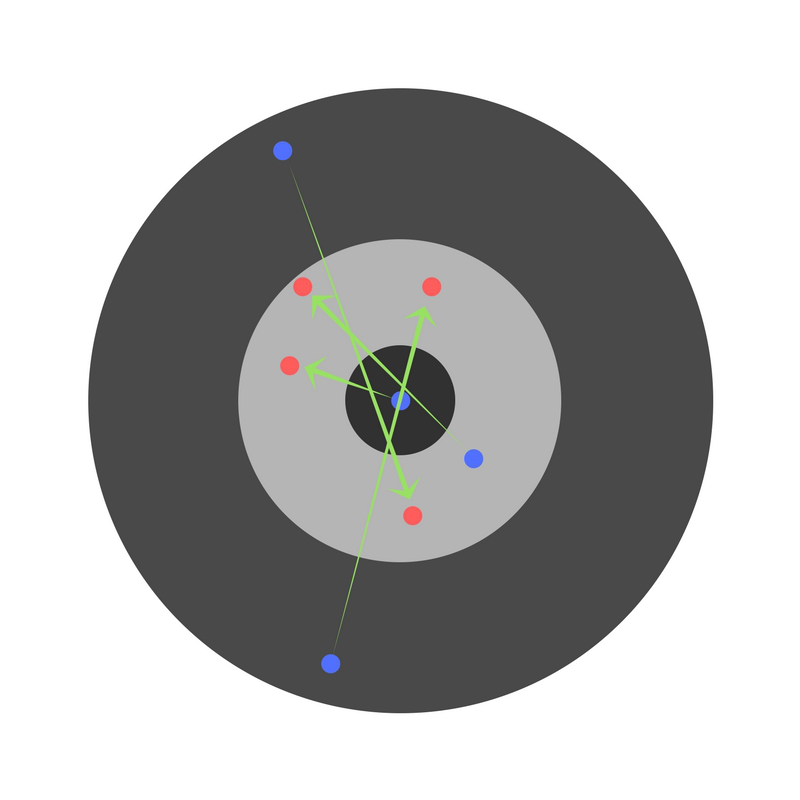

In [132]:
Image.open('../workshop/images/nn_5.jpg')

### Activation Function

Activation Function is one of most powerful arsenal, which is responsible for powers Neural Networks advertised to have. Vaguely, it decides which neurons will be activated, in other words what information would be passed to further layers.

Without activation functions, deep nets lose a bulk of their representation learning power.

These functions' non-linearity is responsible for increased degree of freedom of the learners, enabling them to generalize problems of high dimensionality in lower dimensions.

Below are few examples of popular Activation Functions:

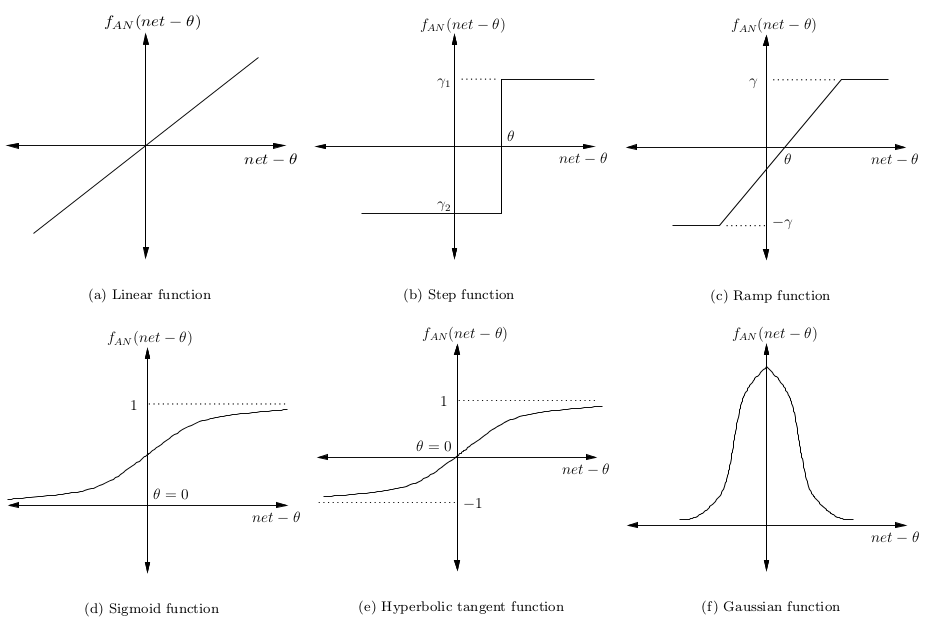

In [130]:
Image.open("../workshop/images/actfn.png")

### Cost Function

Cost Function is at the center of Neural Network. It is used to calculate loss given the real and observed results. Our aim throughout is to minimize this loss. So Cost Function effectively drives the learning of NN towards it's goal.

A cost function is a measure of "how good" a neural network did with respect to it's given training sample and the expected output. It also may depend on variables such as weights and biases.

A cost function is a single value, not a vector, because it rates how good the neural network did as a whole.

Some of the most famous cost functions are:

* Quadratic Cost (Root Mean Square)
* Cross Entropy
* Exponential (AdaBoost)
* Kullback–Leibler divergence or Information Gain